[Feature Matching Tutorial](https://docs.opencv.org/3.4/dc/dc3/tutorial_py_matcher.html)

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
s
import initdirs

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import networkx as nx
import nxpd
import os

nxpd.nxpdParams['show'] = 'ipynb'

In [3]:
from epypes.compgraph import CompGraph
from epypes.compgraph import CompGraphRunner
from epypes.pipeline import Pipeline

from visionfuncs.io import open_image

from visiongraph.features import CGFeatures
from visiongraph.features import create_concrete_feature_cg
from visiongraph.features import create_feature_matching_cg
from visiongraph.features import create_extended_feature_matching_cg
from visiongraph.features import METHOD_PARAMS

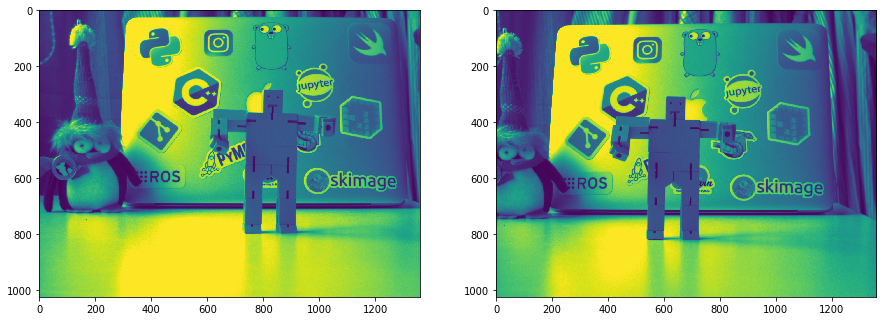

In [4]:
im_gray_1 = open_image(os.path.join(initdirs.DATA_DIR, 'robotmac/left_im0.png'), color_transform=cv2.COLOR_BGR2GRAY)
im_gray_2 = open_image(os.path.join(initdirs.DATA_DIR, 'robotmac/right_im0.png'), color_transform=cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(im_gray_1)
plt.subplot(1, 2, 2)
plt.imshow(im_gray_2)

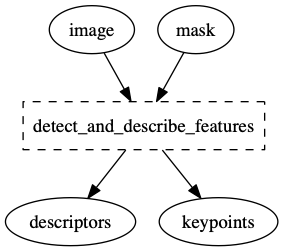

In [5]:
nxpd.draw(CGFeatures().to_networkx())

In [6]:
CHOSEN_METHOD = 'orb'

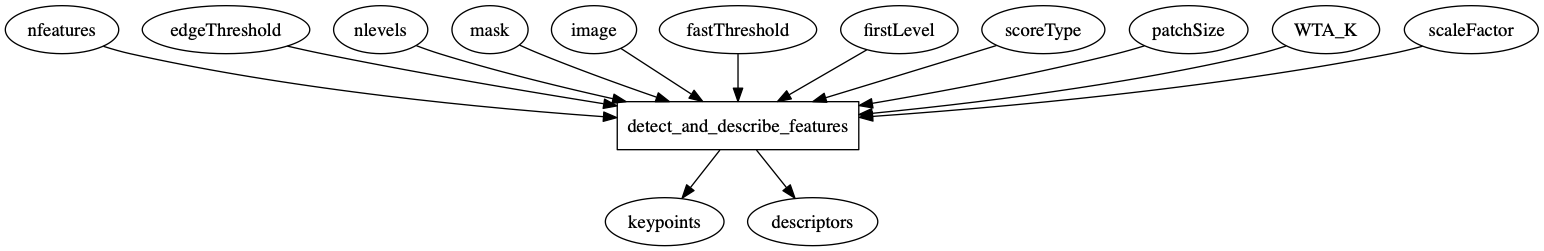

In [7]:
cg_surf = create_concrete_feature_cg(CHOSEN_METHOD)
nxpd.draw(cg_surf.to_networkx())

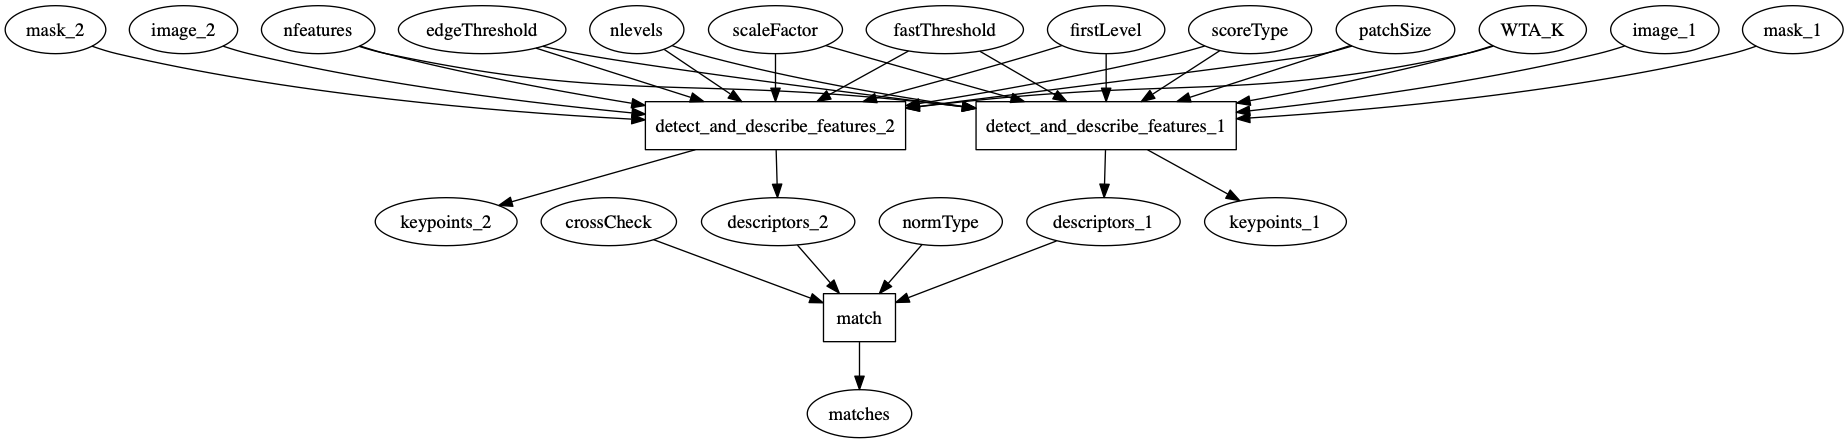

In [8]:
cg_match = create_feature_matching_cg(CHOSEN_METHOD)
nxpd.draw(cg_match.to_networkx())

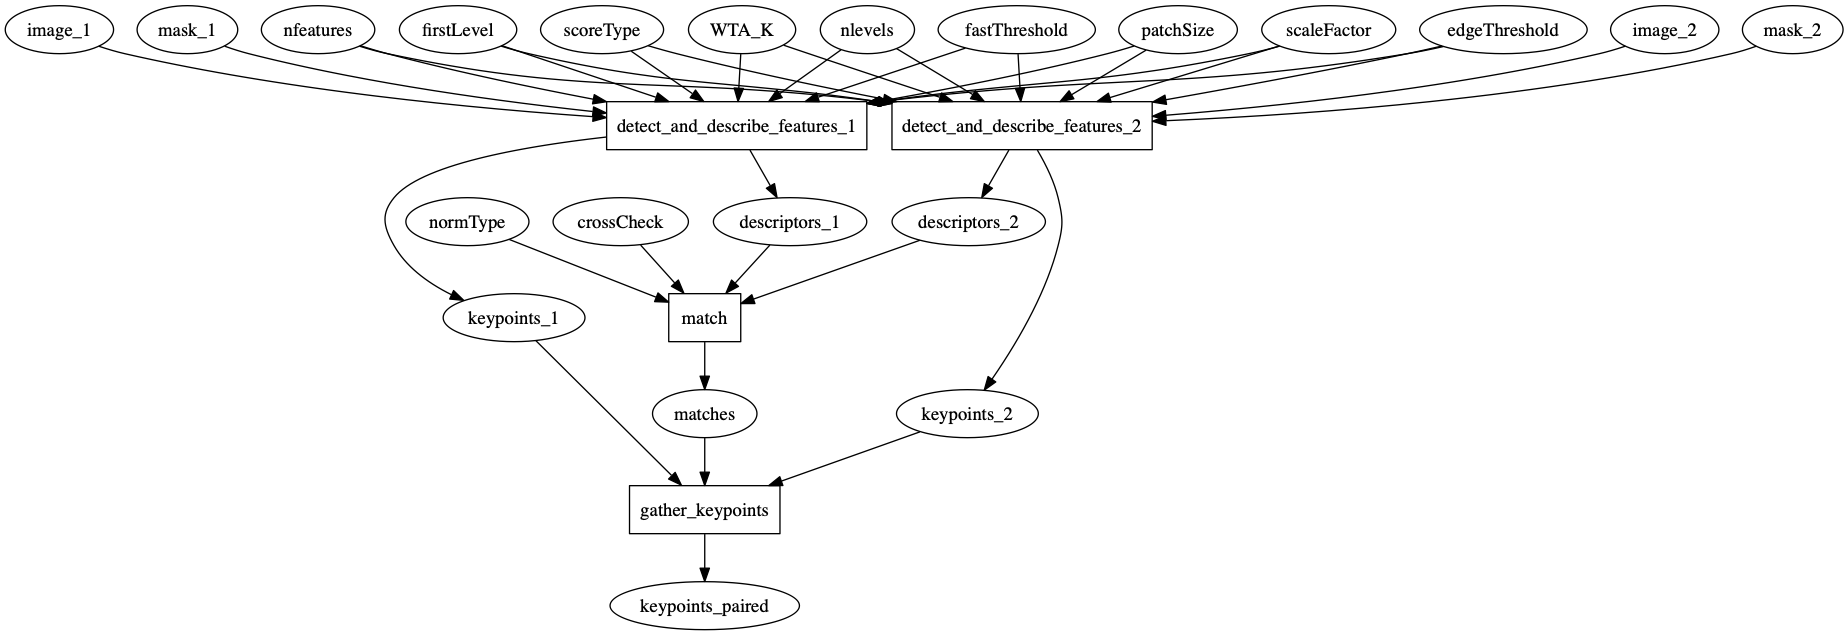

In [9]:
cg_match_ext = create_extended_feature_matching_cg(CHOSEN_METHOD)
nxpd.draw(cg_match_ext.to_networkx())

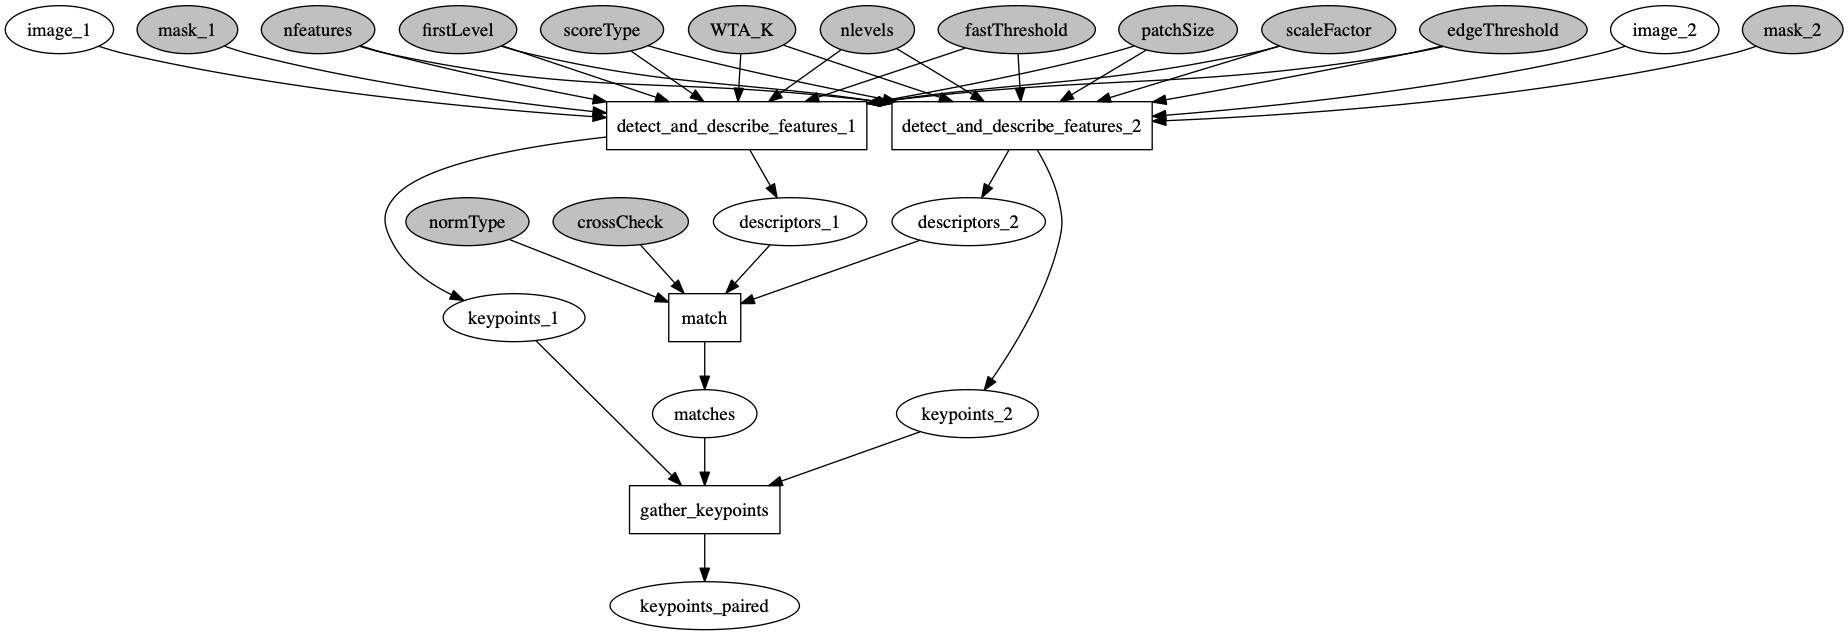

In [10]:
ft = {p: None for p in METHOD_PARAMS[CHOSEN_METHOD]}
ft['mask_1'] = None
ft['mask_2'] = None
ft['normType'] = cv2.NORM_HAMMING
ft['crossCheck'] = True

runner_match = CompGraphRunner(cg_match_ext, frozen_tokens=ft)

nxpd.draw(runner_match.token_manager.to_networkx())

In [11]:
runner_match.run(image_1=im_gray_1, image_2=im_gray_2)

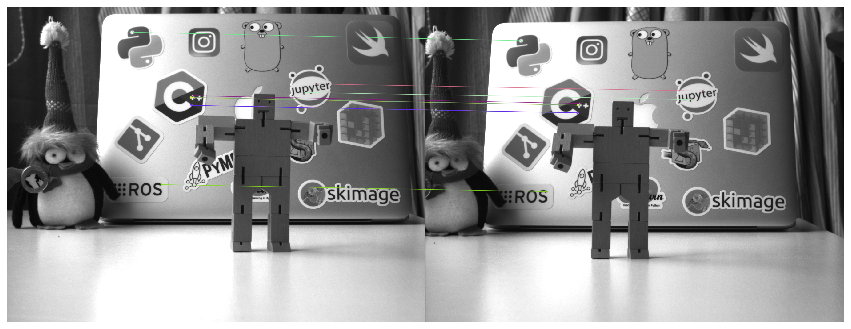

In [12]:
matches = sorted(runner_match['matches'], key=(lambda m : m.distance))

matches_im = cv2.drawMatches(
    im_gray_1, 
    runner_match['keypoints_1'], 
    im_gray_2, 
    runner_match['keypoints_2'], 
    matches[:10], 
    None, 
    flags=2
)

plt.figure(figsize=(15, 10))
_ = plt.imshow(matches_im)
_ = plt.axis('off')


In [13]:
match_pipe = Pipeline('ORBMatcher', cg_match_ext, frozen_tokens=ft)
match_pipe.run(image_1=im_gray_1, image_2=im_gray_2)

In [14]:
match_pipe.traverse_time()

('ORBMatcher',
 0.04000997543334961,
 (('detect_and_describe_features_1', 0.018307209014892578),
  ('detect_and_describe_features_2', 0.020114898681640625),
  ('match', 0.0011699199676513672),
  ('gather_keypoints', 0.0002980232238769531)))

In [15]:
match_pipe['keypoints_paired']

array([[ 599.04003906,  321.12002563,  495.36001587,  345.6000061 ],
       [ 597.19689941,  321.40805054,  493.51687622,  346.29125977],
       [ 603.41766357,  290.30404663,  499.7376709 ,  315.18725586],
       ...,
       [ 584.40002441,  588.        ,  972.51855469,  624.15368652],
       [ 651.94000244,  527.52398682, 1015.23480225,  622.08013916],
       [ 640.        ,  563.        , 1074.81616211,  642.81604004]])

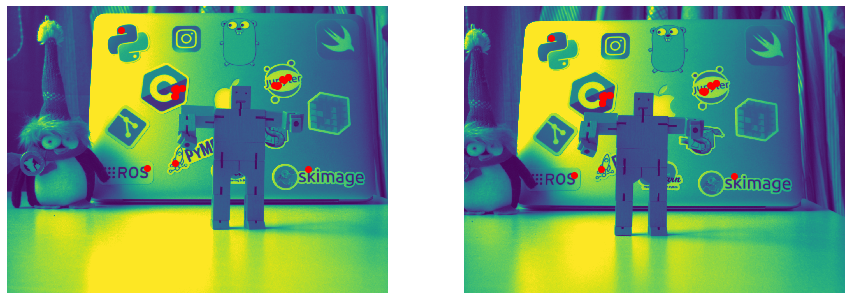

In [16]:
_ = plt.figure(figsize=(15, 15))

N_KEYPOINTS = 20

_ = plt.subplot(1, 2, 1)
_ = plt.axis('off')
_ = plt.imshow(im_gray_1)
_ = plt.plot( match_pipe['keypoints_paired'][:N_KEYPOINTS, 0], match_pipe['keypoints_paired'][:N_KEYPOINTS, 1], 'ro' )

_ = plt.subplot(1, 2, 2)
_ = plt.axis('off')
_ = plt.imshow(im_gray_2)
_ = plt.plot( match_pipe['keypoints_paired'][:N_KEYPOINTS, 2], match_pipe['keypoints_paired'][:N_KEYPOINTS, 3], 'ro' )